In [1]:
import colorstamps
import matplotlib.pyplot as plt
import numpy as np



# Colormaps in sets of three 
This notebook generates colormaps that are in sets of three

The colormaps are generated from the ‘CAM02-LCD’ colorspace as defined in the package colorspacious (https://pypi.org/project/colorspacious/)

https://github.com/trygvrad/colorstamps/ is used for easy access to this colorspace and visualization

In practice, we are are looking for three vectors at 120° angles in the following colorspace:

In [2]:
N2 = 37
N = 19
colorbar_dict = {}

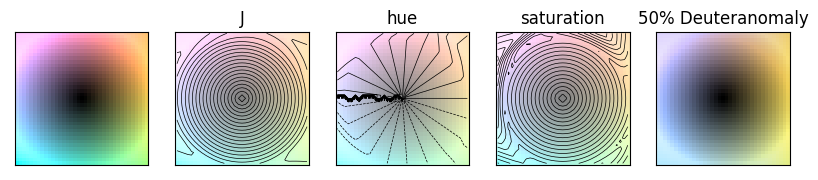

In [3]:
cmap = colorstamps.stamps.get_var_J(l = N2, J = (110,0))
stamp = colorstamps.Stamp(cmap)
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
stamp.eval(axes)

We need to find three vectors at 120° each in this colorspace 

Once we have selected three vectors, we need to make sure they form a greyscale (r=g=b) when they are combinde linearly

Since the vectors are defined at 120° in ‘CAM02-LCD’ colorspace this is not guaranteed when they are added together in RGB colorspace, and we apply a correction for this

We also need to adjust the colormaps so that they start at (0,0,0) and end at (1,1,1) when combined

We then extract the final colormaps from the 3D matrix

# Colorbars 3VarAddA

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


max before adjustment: [0.90765074 1.01986075 1.03356205]
max after adjustment: [0.98702451 0.98702451 0.98702451]
values <0: 16
values >1: 138
check for change in the first 3 values of the first: 
 [[-1.         -1.         -1.        ]
 [-0.93607752 -0.86922866 -0.77463874]
 [-0.72646064 -0.53248626 -0.21462322]]
check for change in the first 3 values of the second:
 [[-1.         -1.         -1.        ]
 [-0.94984924 -0.8458245  -0.94806047]
 [-0.77787413 -0.45031574 -0.79656461]]
check for change in the first 3 values of the second:
 [[-1.         -1.         -1.        ]
 [-0.75442987 -0.92530347 -0.91765742]
 [-0.1841954  -0.70572818 -0.67734235]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

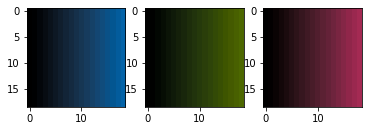

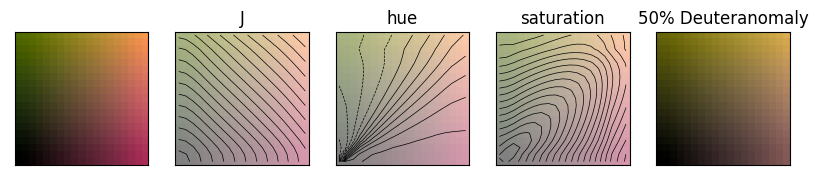

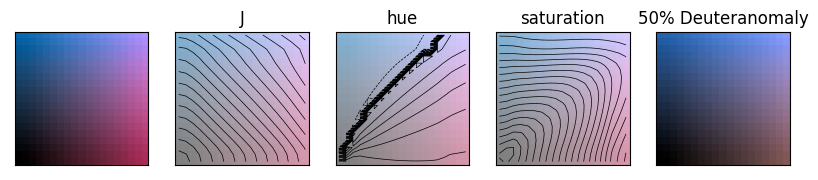

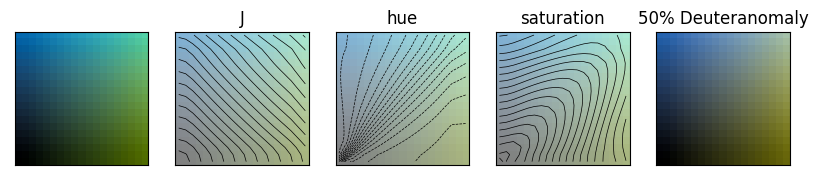

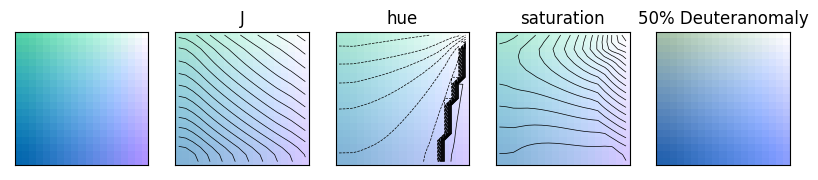

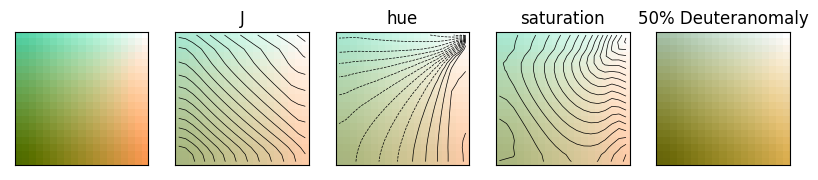

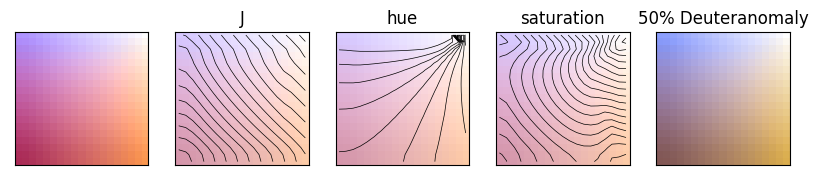

In [4]:
r = 30 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (55.7, 0.75) # range in lightness 
radius = 37
cmap_0 = colorstamps.stamps.get_var_J(l = N2, J = J, rot = r, r = radius)[N,:N] 
cmap_1 = colorstamps.stamps.get_var_J(l = N2, J = J, rot = r+120, r = radius)[N,:N]
cmap_2 = colorstamps.stamps.get_var_J(l = N2, J = J, rot = r+240, r = radius)[N,:N]

print(f'max before adjustment: {cmap_0[0] + cmap_1[0] + cmap_2[0]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(N):
    factor = 1#i/N-1 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_0[i] + cmap_1[i] + cmap_2[i])/3
    for j in range(3):
        d = k - (cmap_0[i,j] + cmap_1[i,j] + cmap_2[i,j])
        cmap_0[i,j] += factor*d/3
        cmap_1[i,j] += factor*d/3
        cmap_2[i,j] += factor*d/3
        
print(f'max after adjustment: {cmap_0[0] + cmap_1[0] + cmap_2[0]}')

cmap_0 -= cmap_0[-1,:]
cmap_1 -= cmap_1[-1,:]
cmap_2 -= cmap_2[-1,:]
fig, axes = plt.subplots(1,3)
axes[0].imshow(cmap_0[::-1]*np.ones((N,N,3)))
axes[1].imshow(cmap_1[::-1]*np.ones((N,N,3)))
axes[2].imshow(cmap_2[::-1]*np.ones((N,N,3)))

# combine to a 2d color matrix
cmap = cmap_0[::-1,np.newaxis,np.newaxis] + cmap_1[np.newaxis,::-1,np.newaxis] + cmap_2[np.newaxis,np.newaxis,::-1]

# ensure the end (when combined) is rgb = (1,1,1), this will avoid problems later
cmap = cmap/cmap[N-1,N-1, N-1][np.newaxis,np.newaxis,np.newaxis,:]

# ensure origin is rgb = (0,0,0)
cmap[0,0,0,:] = 0

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

#print(cmap[N-1,N-1]*N-1, cmap[0,0]*N-1)


# select cbars
colorbar_dict['3VarAddA0'] = cmap[:,0,0]
colorbar_dict['3VarAddA1'] = cmap[0,:,0]
colorbar_dict['3VarAddA2'] = cmap[0,0,:]
print('check for change in the first 3 values of the first: \n', (colorbar_dict['3VarAddA0'][0:3]*N-1))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarAddA1'][0:3]*N-1))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarAddA2'][0:3]*N-1))


# evaluate
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[0,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,0,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,0] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error


fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[-1,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,-1,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,-1] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error

# Colorbars 3VarAddB

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

max before adjustment: [1.01929301 0.95487529 1.03690066]
max after adjustment: [1.00368965 1.00368965 1.00368965]
values <0: 43
values >1: 45
check for change in the first 3 values of the first: 
 [[-1.         -1.         -1.        ]
 [-0.97928298 -0.86149436 -0.86659801]
 [-0.91162663 -0.49096346 -0.51970498]]
check for change in the first 3 values of the second:
 [[-1.         -1.         -1.        ]
 [-0.84543505 -0.9000892  -0.99736001]
 [-0.42848821 -0.63532859 -0.93907809]]
check for change in the first 3 values of the second:
 [[-1.         -1.         -1.        ]
 [-0.85345964 -0.91659411 -0.81421965]
 [-0.46909281 -0.6829156  -0.35042458]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

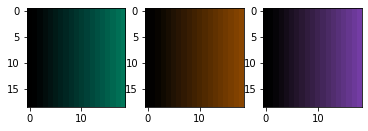

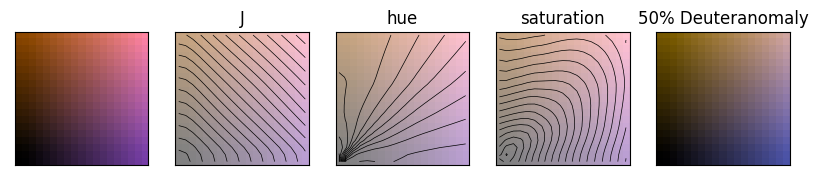

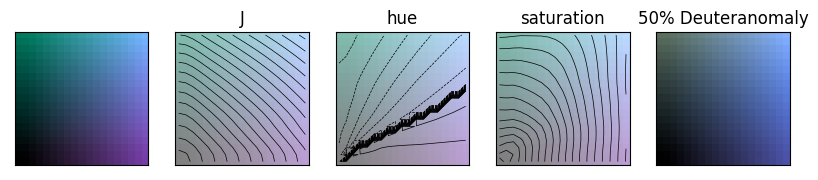

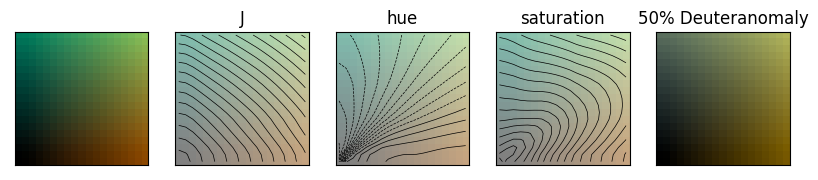

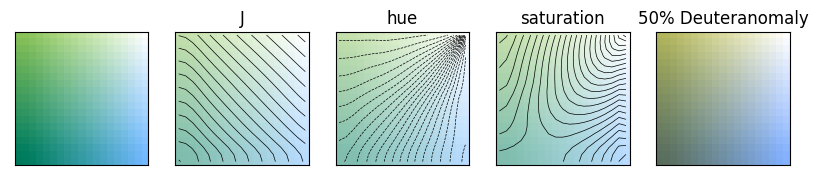

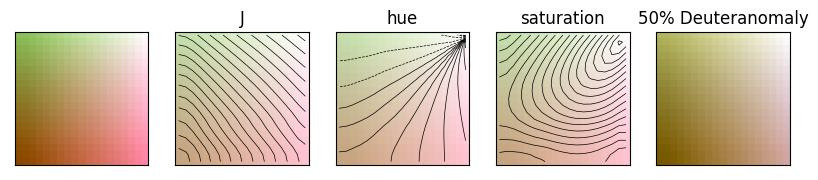

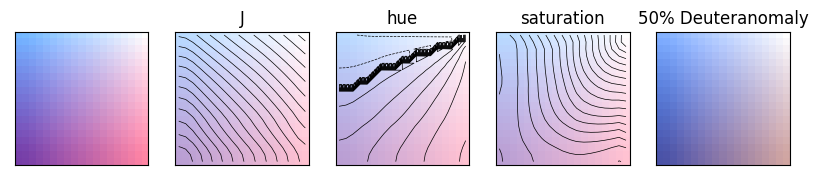

In [5]:
r = -30+120 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (52.8, 0.75) # range in lightness 

radius = 37
cmap_0 = colorstamps.stamps.get_var_J(l = N2, J = J, rot = r, r = radius)[N,:N] 
cmap_1 = colorstamps.stamps.get_var_J(l = N2, J = J, rot = r+120, r = radius)[N,:N]
cmap_2 = colorstamps.stamps.get_var_J(l = N2, J = J, rot = r+240, r = radius)[N,:N]

print(f'max before adjustment: {cmap_0[0] + cmap_1[0] + cmap_2[0]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(N):
    factor = 1#i/N-1 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_0[i] + cmap_1[i] + cmap_2[i])/3
    for j in range(3):
        d = k - (cmap_0[i,j] + cmap_1[i,j] + cmap_2[i,j])
        cmap_0[i,j] += factor*d/3
        cmap_1[i,j] += factor*d/3
        cmap_2[i,j] += factor*d/3
        
print(f'max after adjustment: {cmap_0[0] + cmap_1[0] + cmap_2[0]}')

cmap_0 -= cmap_0[-1,:]
cmap_1 -= cmap_1[-1,:]
cmap_2 -= cmap_2[-1,:]
fig, axes = plt.subplots(1,3)
axes[0].imshow(cmap_0[::-1]*np.ones((N,N,3)))
axes[1].imshow(cmap_1[::-1]*np.ones((N,N,3)))
axes[2].imshow(cmap_2[::-1]*np.ones((N,N,3)))

# combine to a 2d color matrix
cmap = cmap_0[::-1,np.newaxis,np.newaxis] + cmap_1[np.newaxis,::-1,np.newaxis] + cmap_2[np.newaxis,np.newaxis,::-1]

# ensure the end (when combined) is rgb = (1,1,1), this will avoid problems later
cmap = cmap/cmap[N-1,N-1, N-1][np.newaxis,np.newaxis,np.newaxis,:]

# ensure origin is rgb = (0,0,0)
cmap[0,0,0,:] = 0

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

#print(cmap[N-1,N-1]*N-1, cmap[0,0]*N-1)


# select cbars
colorbar_dict['3VarAddB0'] = cmap[:,0,0]
colorbar_dict['3VarAddB1'] = cmap[0,:,0]
colorbar_dict['3VarAddB2'] = cmap[0,0,:]
print('check for change in the first 3 values of the first: \n', (colorbar_dict['3VarAddB0'][0:3]*N-1))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarAddB1'][0:3]*N-1))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarAddB2'][0:3]*N-1))


# evaluate
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[0,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,0,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,0] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error


fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[-1,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,-1,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,-1] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error

# Colorbars 3VarAddC

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


max before adjustment: [1.46539034 1.50189286 1.49254861]
max after adjustment: [1.48661061 1.48661061 1.48661061]
values <0: 0
values >1: 4216
check for change in the first 3 values of the first: 
 [[-1.         -1.         -1.        ]
 [-0.86770324 -0.77617861 -0.64623163]
 [-0.45141422 -0.22506391  0.12266775]]
check for change in the first 3 values of the second:
 [[-1.         -1.         -1.        ]
 [-0.89028991 -0.74283985 -0.8816209 ]
 [-0.52423605 -0.14030966 -0.55163239]]
check for change in the first 3 values of the second:
 [[-1.         -1.         -1.        ]
 [-0.61517537 -0.85415006 -0.84531599]
 [ 0.15813694 -0.45213976 -0.38854869]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

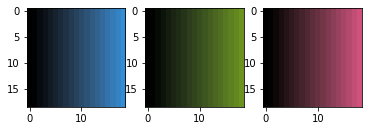

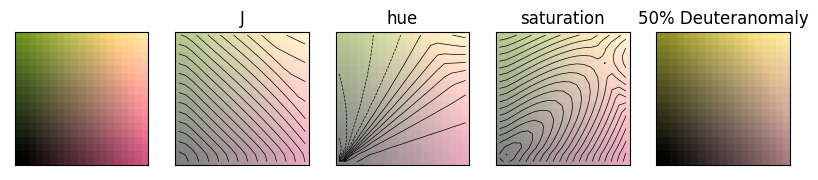

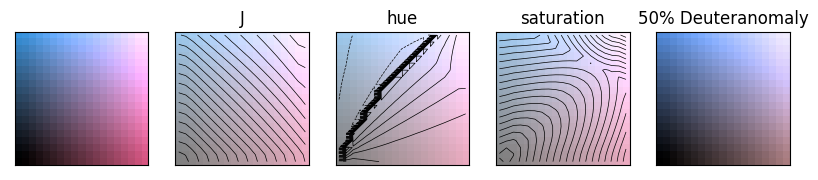

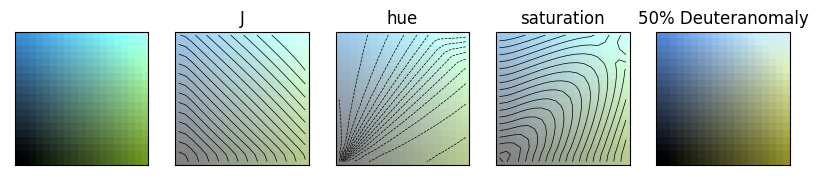

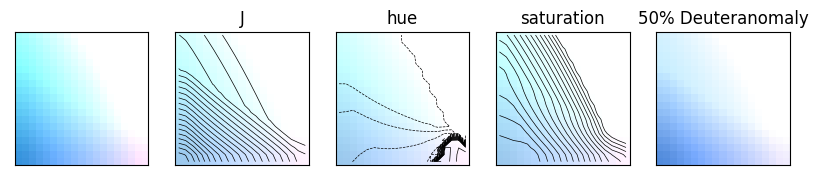

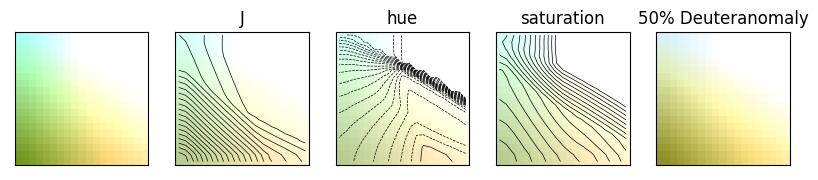

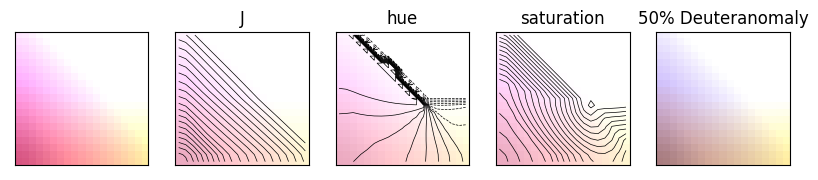

In [6]:
r = 30 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (77, 0.75) # range in lightness 
radius = 37

cmap_0 = colorstamps.stamps.get_var_J(l = N2, J = J, rot = r, r = radius)[N,:N] 
cmap_1 = colorstamps.stamps.get_var_J(l = N2, J = J, rot = r+120, r = radius)[N,:N]
cmap_2 = colorstamps.stamps.get_var_J(l = N2, J = J, rot = r+240, r = radius)[N,:N]

print(f'max before adjustment: {cmap_0[0] + cmap_1[0] + cmap_2[0]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(N):
    factor = 1#i/N-1 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_0[i] + cmap_1[i] + cmap_2[i])/3
    for j in range(3):
        d = k - (cmap_0[i,j] + cmap_1[i,j] + cmap_2[i,j])
        cmap_0[i,j] += factor*d/3
        cmap_1[i,j] += factor*d/3
        cmap_2[i,j] += factor*d/3
        
print(f'max after adjustment: {cmap_0[0] + cmap_1[0] + cmap_2[0]}')

cmap_0 -= cmap_0[-1,:]
cmap_1 -= cmap_1[-1,:]
cmap_2 -= cmap_2[-1,:]
fig, axes = plt.subplots(1,3)
axes[0].imshow(cmap_0[::-1]*np.ones((N,N,3)))
axes[1].imshow(cmap_1[::-1]*np.ones((N,N,3)))
axes[2].imshow(cmap_2[::-1]*np.ones((N,N,3)))
# combine to a 2d color matrix
cmap = cmap_0[::-1,np.newaxis,np.newaxis] + cmap_1[np.newaxis,::-1,np.newaxis] + cmap_2[np.newaxis,np.newaxis,::-1]

# ensure the end (when combined) is rgb = (1,1,1), this will avoid problems later
cmap = cmap *3/2/ cmap[N-1,N-1, N-1][np.newaxis,np.newaxis,np.newaxis,:]

# ensure origin is rgb = (0,0,0)
cmap[0,0,0,:] = 0

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

#print(cmap[N-1,N-1]*N-1, cmap[0,0]*N-1)


# select cbars
colorbar_dict['3VarAddC0'] = cmap[:,0,0]
colorbar_dict['3VarAddC1'] = cmap[0,:,0]
colorbar_dict['3VarAddC2'] = cmap[0,0,:]
print('check for change in the first 3 values of the first: \n', (colorbar_dict['3VarAddC0'][0:3]*N-1))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarAddC1'][0:3]*N-1))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarAddC2'][0:3]*N-1))


# evaluate
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[0,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,0,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,0] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error


fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[-1,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,-1,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,-1] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error

# Colorbars 3VarAddD

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


max before adjustment: [1.41777509 1.50176493 1.45341769]
max after adjustment: [1.45765257 1.45765257 1.45765257]
values <0: 0
values >1: 4206
check for change in the first 3 values of the first: 
 [[-1.         -1.         -1.        ]
 [-0.91830751 -0.74053235 -0.74269788]
 [-0.66719927 -0.10843068 -0.11885079]]
check for change in tColorbarshe first 3 values of the second:
 [[-1.00000000e+00 -1.00000000e+00 -1.00000000e+00]
 [-7.18475435e-01 -7.96626209e-01 -9.53010949e-01]
 [ 2.16975808e-04 -2.93327498e-01 -7.46987709e-01]]
check for change in the first 3 values of the second:
 [[-1.         -1.         -1.        ]
 [-0.72505443 -0.82467882 -0.66612855]
 [-0.09227181 -0.35749594  0.10658439]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

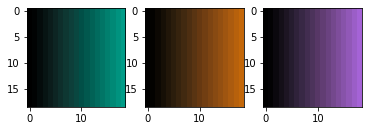

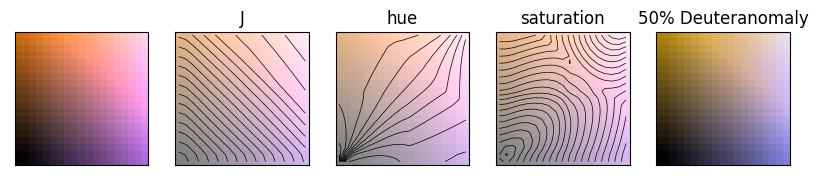

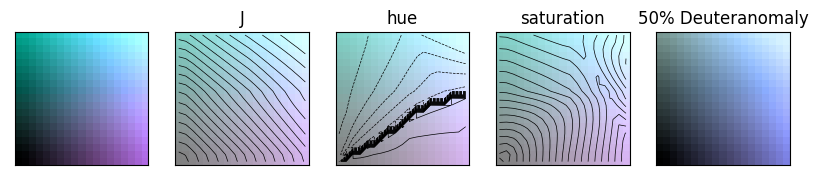

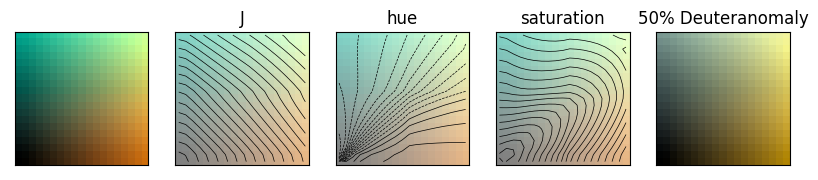

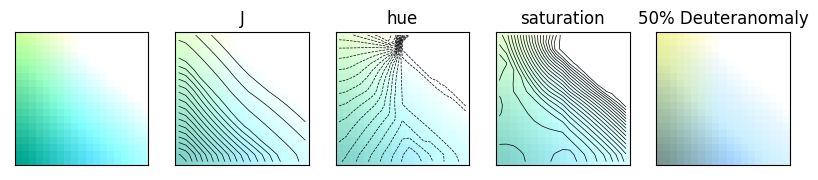

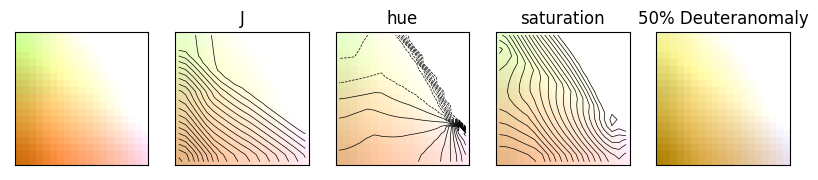

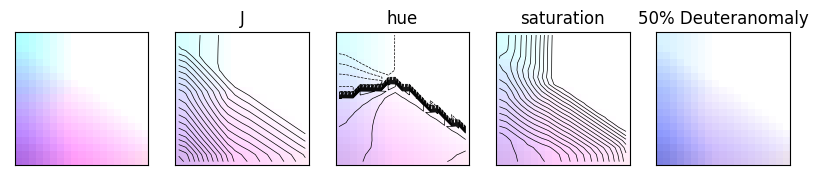

In [7]:
r = -30+120 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (77, 0.75) # range in lightness 
radius = 37

cmap_0 = colorstamps.stamps.get_var_J(l = N2, J = J, rot = r, r = radius)[N,:N] 
cmap_1 = colorstamps.stamps.get_var_J(l = N2, J = J, rot = r+120, r = radius)[N,:N]
cmap_2 = colorstamps.stamps.get_var_J(l = N2, J = J, rot = r+240, r = radius)[N,:N]

print(f'max before adjustment: {cmap_0[0] + cmap_1[0] + cmap_2[0]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(N):
    factor = 1#i/N-1 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_0[i] + cmap_1[i] + cmap_2[i])/3
    for j in range(3):
        d = k - (cmap_0[i,j] + cmap_1[i,j] + cmap_2[i,j])
        cmap_0[i,j] += factor*d/3
        cmap_1[i,j] += factor*d/3
        cmap_2[i,j] += factor*d/3
        
print(f'max after adjustment: {cmap_0[0] + cmap_1[0] + cmap_2[0]}')

cmap_0 -= cmap_0[-1,:]
cmap_1 -= cmap_1[-1,:]
cmap_2 -= cmap_2[-1,:]
fig, axes = plt.subplots(1,3)
axes[0].imshow(cmap_0[::-1]*np.ones((N,N,3)))
axes[1].imshow(cmap_1[::-1]*np.ones((N,N,3)))
axes[2].imshow(cmap_2[::-1]*np.ones((N,N,3)))

# combine to a 2d color matrix
cmap = cmap_0[::-1,np.newaxis,np.newaxis] + cmap_1[np.newaxis,::-1,np.newaxis] + cmap_2[np.newaxis,np.newaxis,::-1]

# ensure the end (when combined) is rgb = (1,1,1), this will avoid problems later
cmap = cmap *3/2/ cmap[N-1,N-1, N-1][np.newaxis,np.newaxis,np.newaxis,:]

# ensure origin is rgb = (0,0,0)
cmap[0,0,0,:] = 0

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

#print(cmap[N-1,N-1]*N-1, cmap[0,0]*N-1)


# select cbars
colorbar_dict['3VarAddD0'] = cmap[:,0,0]
colorbar_dict['3VarAddD1'] = cmap[0,:,0]
colorbar_dict['3VarAddD2'] = cmap[0,0,:]
print('check for change in the first 3 values of the first: \n', (colorbar_dict['3VarAddD0'][0:3]*N-1))
print('check for change in tColorbarshe first 3 values of the second:\n', (colorbar_dict['3VarAddD1'][0:3]*N-1))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarAddD2'][0:3]*N-1))


# evaluate
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[0,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,0,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,0] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error


fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[-1,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,-1,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,-1] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error

# 3VarSubA

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

max before adjustment: [ 0.00604699  0.02389056 -0.03160328]
min before adjustment: [0.93446846 0.87666139 0.86057065]
max after adjustment: [-0.00055524 -0.00055524 -0.00055524]
min after adjustment: [0.89056683 0.89056683 0.89056683]
values <0: 0
values >1: 105
check for change in the first 3 values of the first: 
 [[18.         18.         18.        ]
 [17.64906978 17.93249377 18.        ]
 [17.19004272 17.71971959 18.        ]]
check for change in the first 3 values of the second:
 [[18.         18.         18.        ]
 [17.72277329 17.94940216 17.63783801]
 [17.30741999 17.77707788 17.06978981]]
check for change in the first 3 values of the second:
 [[18.         18.         18.        ]
 [18.         17.72000111 17.85893791]
 [18.         17.30536261 17.6157875 ]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

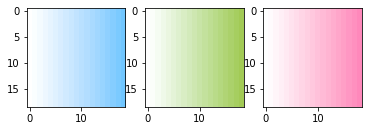

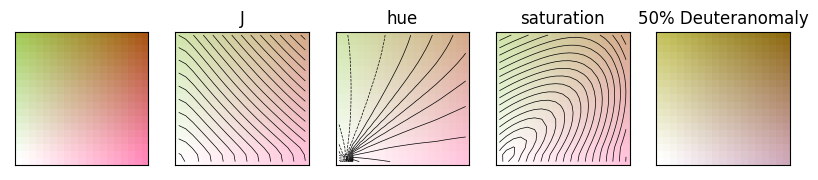

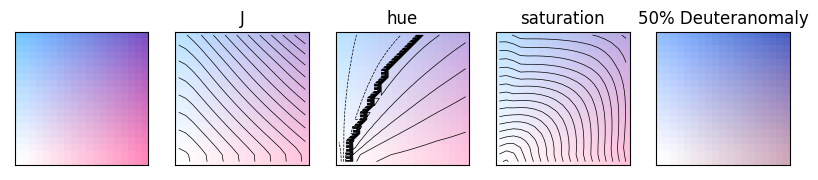

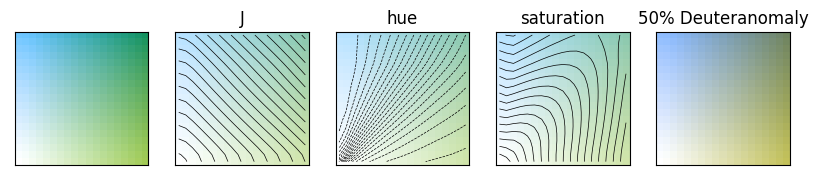

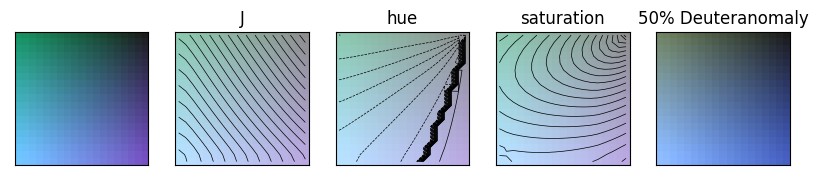

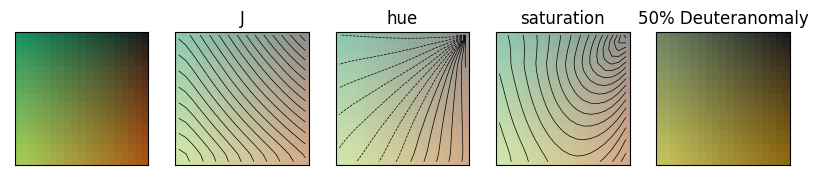

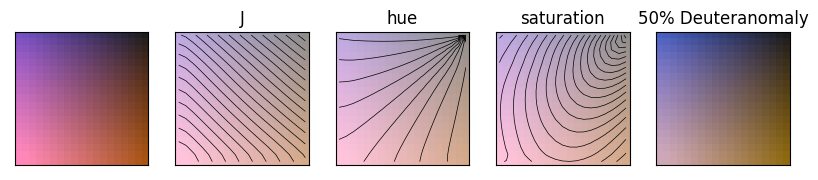

In [8]:
r = 30 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (98.6, 128) # range in lightness 
radius = 37

cmap_0 = colorstamps.stamps.get_var_J(l = N2, J = J, rot = r, r = radius)[N,:N] 
cmap_1 = colorstamps.stamps.get_var_J(l = N2, J = J, rot = r+120, r = radius)[N,:N]
cmap_2 = colorstamps.stamps.get_var_J(l = N2, J = J, rot = r+240, r = radius)[N,:N]

print(f'max before adjustment: {-2 + cmap_0[0] + cmap_1[0] + cmap_2[0]}')
print(f'min before adjustment: {-2 + cmap_0[-1] + cmap_1[-1] + cmap_2[-1]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(N):
    factor = 1#i/N-1 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_0[i] + cmap_1[i] + cmap_2[i])/3
    for j in range(3):
        d = k - (cmap_0[i,j] + cmap_1[i,j] + cmap_2[i,j])
        cmap_0[i,j] += factor*d/3
        cmap_1[i,j] += factor*d/3
        cmap_2[i,j] += factor*d/3
        
print(f'max after adjustment: {-2 + cmap_0[0] + cmap_1[0] + cmap_2[0]}')
print(f'min after adjustment: {-2 + cmap_0[-1] + cmap_1[-1] + cmap_2[-1]}')

cmap_0 += 1-cmap_0[-1,:][np.newaxis,:]
cmap_1 += 1-cmap_1[-1,:][np.newaxis,:]
cmap_2 += 1-cmap_2[-1,:][np.newaxis,:]
fig, axes = plt.subplots(1,3)
axes[0].imshow(cmap_0[::-1]*np.ones((N,N,3)))
axes[1].imshow(cmap_1[::-1]*np.ones((N,N,3)))
axes[2].imshow(cmap_2[::-1]*np.ones((N,N,3)))

# combine to a 2d color matrix
cmap = 1 \
    -(1-cmap_0[::-1,np.newaxis,np.newaxis]) \
    -(1- cmap_1[np.newaxis,::-1,np.newaxis]) \
    -(1-cmap_2[np.newaxis,np.newaxis,::-1])

# ensure the end (when combined) is rgb = (1,1,1), this will avoid problems later
cmap = cmap/cmap[0,0, 0][np.newaxis,np.newaxis,np.newaxis,:]

# ensure origin is rgb = (0,0,0)
#cmap[0,0,0,:] = 0

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

#print(cmap[N-1,N-1]*N-1, cmap[0,0]*N-1)


# select cbars
colorbar_dict['3VarSubA0'] = cmap[:,0,0]
colorbar_dict['3VarSubA1'] = cmap[0,:,0]
colorbar_dict['3VarSubA2'] = cmap[0,0,:]
print('check for change in the first 3 values of the first: \n', (colorbar_dict['3VarSubA0'][0:3]*N-1))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarSubA1'][0:3]*N-1))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarSubA2'][0:3]*N-1))


# evaluate
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[0,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,0,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,0] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error


fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[-1,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,-1,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,-1] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error

# 3VarSubB

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

max before adjustment: [-0.12560145  0.13768971  0.01710777]
min before adjustment: [0.94284688 0.88366322 0.86918522]
max after adjustment: [0.00973201 0.00973201 0.00973201]
min after adjustment: [0.8985651 0.8985651 0.8985651]
values <0: 32
values >1: 290
check for change in the first 3 values of the first: 
 [[18.         18.         18.        ]
 [17.63953666 17.97505981 17.91395417]
 [17.09055274 17.86171435 17.75737524]]
check for change in the first 3 values of the second:
 [[18.         18.         18.        ]
 [18.         17.83645577 17.50193897]
 [18.         17.53797132 16.86160332]]
check for change in the first 3 values of the second:
 [[18.         18.         18.        ]
 [17.91107821 17.83372139 18.        ]
 [17.72434435 17.55048933 18.        ]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

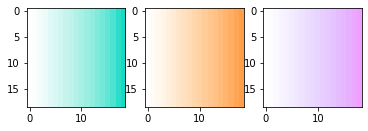

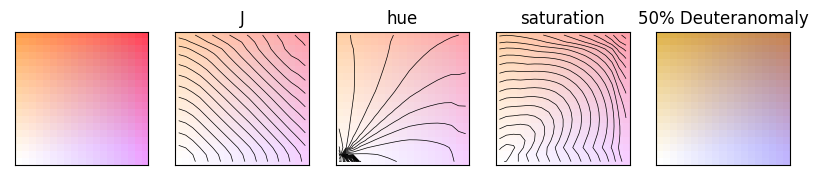

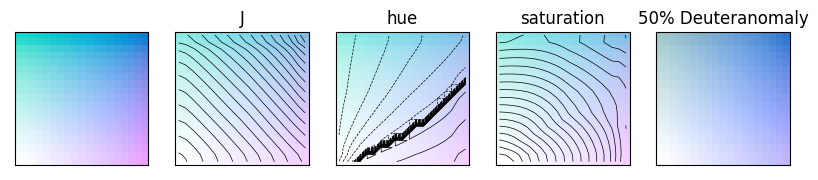

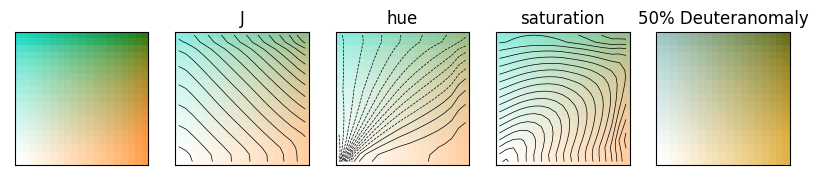

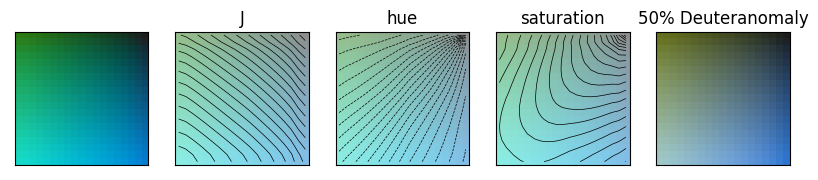

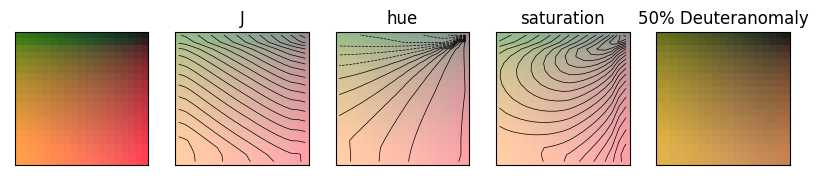

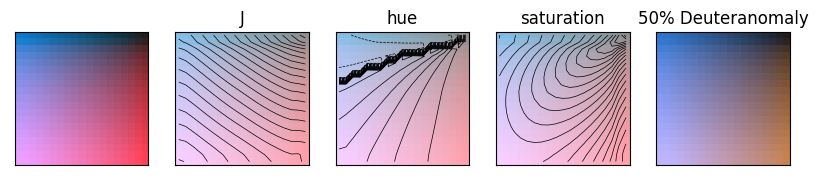

In [9]:
r = -30+120 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (103, 128) # range in lightness 
radius = 37

cmap_0 = colorstamps.stamps.get_var_J(l = N2, J = J, rot = r, r = radius)[N,:N] 
cmap_1 = colorstamps.stamps.get_var_J(l = N2, J = J, rot = r+120, r = radius)[N,:N]
cmap_2 = colorstamps.stamps.get_var_J(l = N2, J = J, rot = r+240, r = radius)[N,:N]

print(f'max before adjustment: {-2 + cmap_0[0] + cmap_1[0] + cmap_2[0]}')
print(f'min before adjustment: {-2 + cmap_0[-1] + cmap_1[-1] + cmap_2[-1]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(N):
    factor = 1#i/N-1 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_0[i] + cmap_1[i] + cmap_2[i])/3
    for j in range(3):
        d = k - (cmap_0[i,j] + cmap_1[i,j] + cmap_2[i,j])
        cmap_0[i,j] += factor*d/3
        cmap_1[i,j] += factor*d/3
        cmap_2[i,j] += factor*d/3
        
print(f'max after adjustment: {-2 + cmap_0[0] + cmap_1[0] + cmap_2[0]}')
print(f'min after adjustment: {-2 + cmap_0[-1] + cmap_1[-1] + cmap_2[-1]}')

cmap_0 += 1-cmap_0[-1,:][np.newaxis,:]
cmap_1 += 1-cmap_1[-1,:][np.newaxis,:]
cmap_2 += 1-cmap_2[-1,:][np.newaxis,:]
fig, axes = plt.subplots(1,3)
axes[0].imshow(cmap_0[::-1]*np.ones((N,N,3)))
axes[1].imshow(cmap_1[::-1]*np.ones((N,N,3)))
axes[2].imshow(cmap_2[::-1]*np.ones((N,N,3)))

# combine to a 2d color matrix
cmap = 1 \
    -(1-cmap_0[::-1,np.newaxis,np.newaxis]) \
    -(1- cmap_1[np.newaxis,::-1,np.newaxis]) \
    -(1-cmap_2[np.newaxis,np.newaxis,::-1])

# ensure origin is rgb = (0,0,0)
#cmap[0,0,0,:] = 0

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

#print(cmap[N-1,N-1]*N-1, cmap[0,0]*N-1)


# select cbars
colorbar_dict['3VarSubB0'] = cmap[:,0,0]
colorbar_dict['3VarSubB1'] = cmap[0,:,0]
colorbar_dict['3VarSubB2'] = cmap[0,0,:]
print('check for change in the first 3 values of the first: \n', (colorbar_dict['3VarSubB0'][0:3]*N-1))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarSubB1'][0:3]*N-1))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarSubB2'][0:3]*N-1))


# evaluate
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[0,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,0,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,0] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error


fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[-1,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,-1,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,-1] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error

# 3VarSubC

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


max before adjustment: [-0.52380401 -0.48869466 -0.49803493]
min before adjustment: [0.89830266 0.84113635 0.82518439]
max after adjustment: [-0.5035112 -0.5035112 -0.5035112]
min after adjustment: [0.85487447 0.85487447 0.85487447]
values <0: 2364
values >1: 3
check for change in the first 3 values of the first: 
 [[18.         18.         18.        ]
 [17.55847192 17.8408854  18.        ]
 [16.92044112 17.45156495 17.84439034]]
check for change in the first 3 values of the second:
 [[18.         18.         18.        ]
 [17.63237174 17.85747279 17.54721689]
 [17.03862968 17.50774487 16.80525747]]
check for change in the first 3 values of the second:
 [[18.         18.         18.        ]
 [18.         17.62924744 17.76805498]
 [18.         17.03984617 17.34950817]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


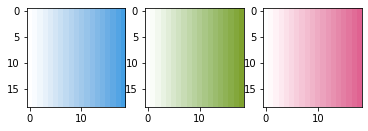

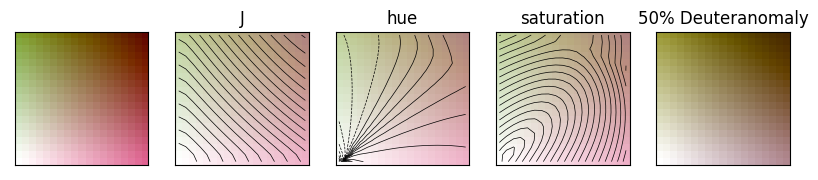

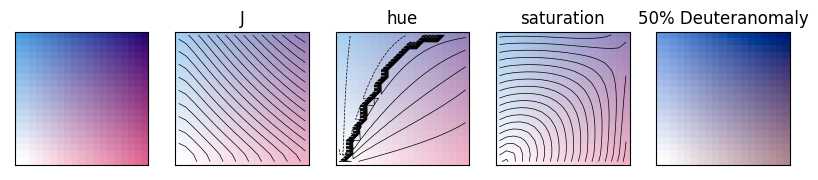

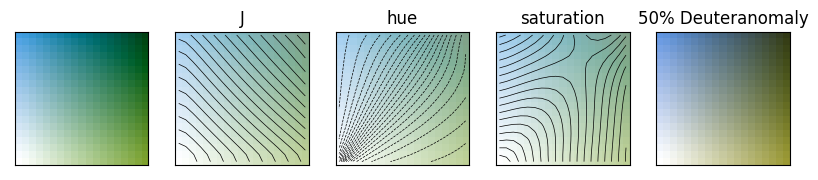

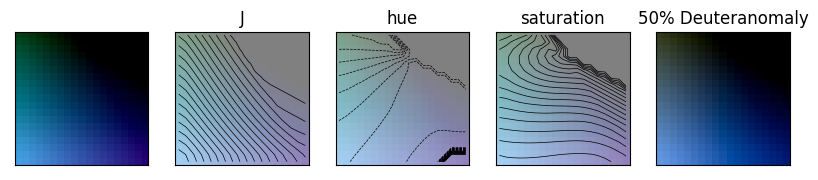

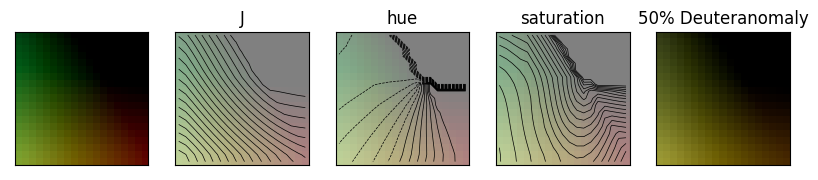

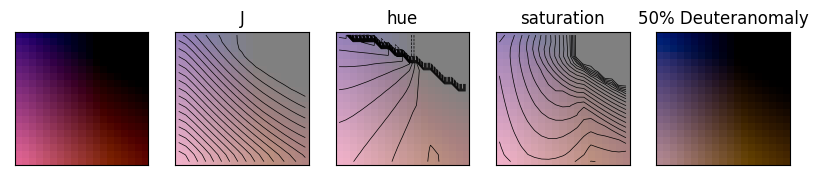

In [10]:
r = 30 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (77.6, 128) # range in lightness  
radius = 37

cmap_0 = colorstamps.stamps.get_var_J(l = N2, J = J, rot = r, r = radius)[N,:N] 
cmap_1 = colorstamps.stamps.get_var_J(l = N2, J = J, rot = r+120, r = radius)[N,:N]
cmap_2 = colorstamps.stamps.get_var_J(l = N2, J = J, rot = r+240, r = radius)[N,:N]

print(f'max before adjustment: {-2 + cmap_0[0] + cmap_1[0] + cmap_2[0]}')
print(f'min before adjustment: {-2 + cmap_0[-1] + cmap_1[-1] + cmap_2[-1]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(N):
    factor = 1#i/N-1 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_0[i] + cmap_1[i] + cmap_2[i])/3
    for j in range(3):
        d = k - (cmap_0[i,j] + cmap_1[i,j] + cmap_2[i,j])
        cmap_0[i,j] += factor*d/3
        cmap_1[i,j] += factor*d/3
        cmap_2[i,j] += factor*d/3
        
print(f'max after adjustment: {-2 + cmap_0[0] + cmap_1[0] + cmap_2[0]}')
print(f'min after adjustment: {-2 + cmap_0[-1] + cmap_1[-1] + cmap_2[-1]}')

cmap_0 += 1-cmap_0[-1,:][np.newaxis,:]
cmap_1 += 1-cmap_1[-1,:][np.newaxis,:]
cmap_2 += 1-cmap_2[-1,:][np.newaxis,:]
fig, axes = plt.subplots(1,3)
axes[0].imshow(cmap_0[::-1]*np.ones((N,N,3)))
axes[1].imshow(cmap_1[::-1]*np.ones((N,N,3)))
axes[2].imshow(cmap_2[::-1]*np.ones((N,N,3)))


# combine to a 2d color matrix
cmap = 1 \
    -(1-cmap_0[::-1,np.newaxis,np.newaxis]) \
    -(1- cmap_1[np.newaxis,::-1,np.newaxis]) \
    -(1-cmap_2[np.newaxis,np.newaxis,::-1])

# ensure the end (when combined) is rgb = (1,1,1), this will avoid problems later
cmap = cmap/cmap[0,0, 0][np.newaxis,np.newaxis,np.newaxis,:]

# ensure origin is rgb = (0,0,0)
#cmap[0,0,0,:] = 0

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

#print(cmap[N-1,N-1]*N-1, cmap[0,0]*N-1)


# select cbars
colorbar_dict['3VarSubC0'] = cmap[:,0,0]
colorbar_dict['3VarSubC1'] = cmap[0,:,0]
colorbar_dict['3VarSubC2'] = cmap[0,0,:]
print('check for change in the first 3 values of the first: \n', (colorbar_dict['3VarSubC0'][0:3]*N-1))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarSubC1'][0:3]*N-1))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarSubC2'][0:3]*N-1))


# evaluate
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[0,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,0,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,0] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error


fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[-1,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,-1,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,-1] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error

# 3VarSubD

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


max before adjustment: [-0.57532571 -0.48882771 -0.53583498]
min before adjustment: [0.89905804 0.84065684 0.82633982]
max after adjustment: [-0.53332947 -0.53332947 -0.53332947]
min after adjustment: [0.85535157 0.85535157 0.85535157]
values <0: 3351
values >1: 1
check for change in the first 3 values of the first: 
 [[18.         18.         18.        ]
 [17.53018259 17.86374335 17.80249011]
 [16.76928607 17.53346499 17.42852644]]
check for change in the first 3 values of the second:
 [[18.         18.         18.        ]
 [17.98307218 17.72572063 17.39348904]
 [17.80585566 17.21199143 16.54290405]]
check for change in the first 3 values of the second:
 [[18.         18.         18.        ]
 [17.79958342 17.72337421 18.        ]
 [17.39581135 17.22549666 17.99952259]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


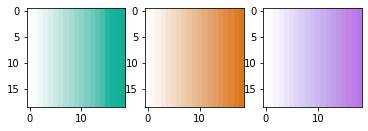

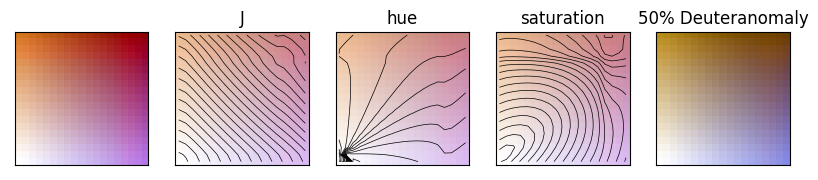

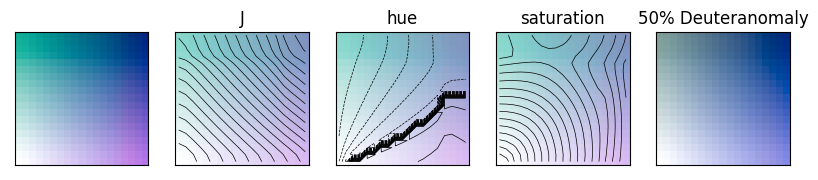

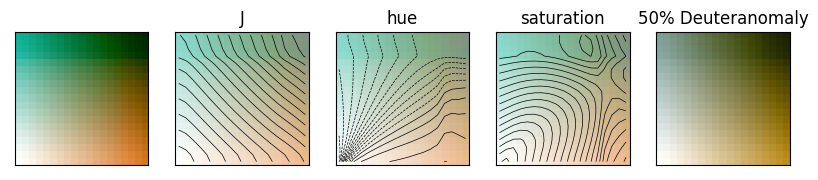

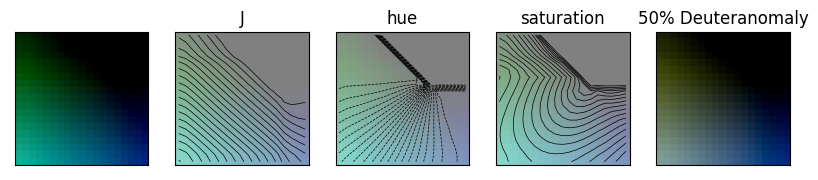

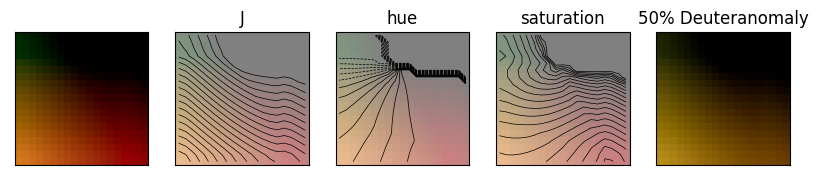

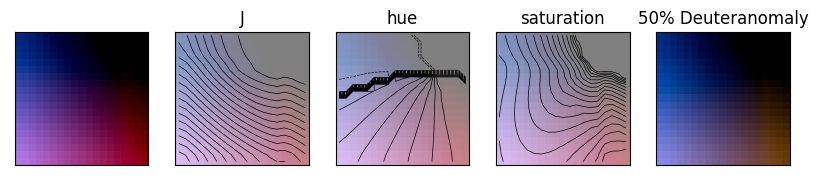

In [11]:
r = -30+120 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (77.6, 128) # range in lightness  
radius = 37

cmap_0 = colorstamps.stamps.get_var_J(l = N2, J = J, rot = r, r = radius)[N,:N] 
cmap_1 = colorstamps.stamps.get_var_J(l = N2, J = J, rot = r+120, r = radius)[N,:N]
cmap_2 = colorstamps.stamps.get_var_J(l = N2, J = J, rot = r+240, r = radius)[N,:N]

print(f'max before adjustment: {-2 + cmap_0[0] + cmap_1[0] + cmap_2[0]}')
print(f'min before adjustment: {-2 + cmap_0[-1] + cmap_1[-1] + cmap_2[-1]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(N):
    factor = 1#i/N-1 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_0[i] + cmap_1[i] + cmap_2[i])/3
    for j in range(3):
        d = k - (cmap_0[i,j] + cmap_1[i,j] + cmap_2[i,j])
        cmap_0[i,j] += factor*d/3
        cmap_1[i,j] += factor*d/3
        cmap_2[i,j] += factor*d/3
        
print(f'max after adjustment: {-2 + cmap_0[0] + cmap_1[0] + cmap_2[0]}')
print(f'min after adjustment: {-2 + cmap_0[-1] + cmap_1[-1] + cmap_2[-1]}')

cmap_0 += 1-cmap_0[-1,:][np.newaxis,:]
cmap_1 += 1-cmap_1[-1,:][np.newaxis,:]
cmap_2 += 1-cmap_2[-1,:][np.newaxis,:]
fig, axes = plt.subplots(1,3)
axes[0].imshow(cmap_0[::-1]*np.ones((N,N,3)))
axes[1].imshow(cmap_1[::-1]*np.ones((N,N,3)))
axes[2].imshow(cmap_2[::-1]*np.ones((N,N,3)))


# combine to a 2d color matrix
cmap = 1 \
    -(1-cmap_0[::-1,np.newaxis,np.newaxis]) \
    -(1- cmap_1[np.newaxis,::-1,np.newaxis]) \
    -(1-cmap_2[np.newaxis,np.newaxis,::-1])

# ensure the end (when combined) is rgb = (1,1,1), this will avoid problems later
cmap = cmap/cmap[0,0, 0][np.newaxis,np.newaxis,np.newaxis,:]

# ensure origin is rgb = (0,0,0)
#cmap[0,0,0,:] = 0

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

#print(cmap[N-1,N-1]*N-1, cmap[0,0]*N-1)


# select cbars
colorbar_dict['3VarSubD0'] = cmap[:,0,0]
colorbar_dict['3VarSubD1'] = cmap[0,:,0]
colorbar_dict['3VarSubD2'] = cmap[0,0,:]
print('check for change in the first 3 values of the first: \n', (colorbar_dict['3VarSubD0'][0:3]*N-1))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarSubD1'][0:3]*N-1))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarSubD2'][0:3]*N-1))


# evaluate
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[0,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,0,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,0] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error


fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[-1,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,-1,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,-1] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error

In [12]:
import pickle
with open(r"3vars.pickle", "wb") as output_file:
    pickle.dump(colorbar_dict, output_file)